In [1]:
#Stock Market Prediction & Forcasting Using stacked LSTM

In [2]:
import numpy as np
import pandas as pd

C:\Users\tridi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
#reading the dataset
data= pd.read_csv('stock_data.csv')

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.shape

(2035, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
#check for null values 
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
#info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [81]:
#now we are working on opening price of the day

In [82]:
df= data.reset_index()['Open']
print(df)

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64


In [11]:
#data visualization

In [12]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: >

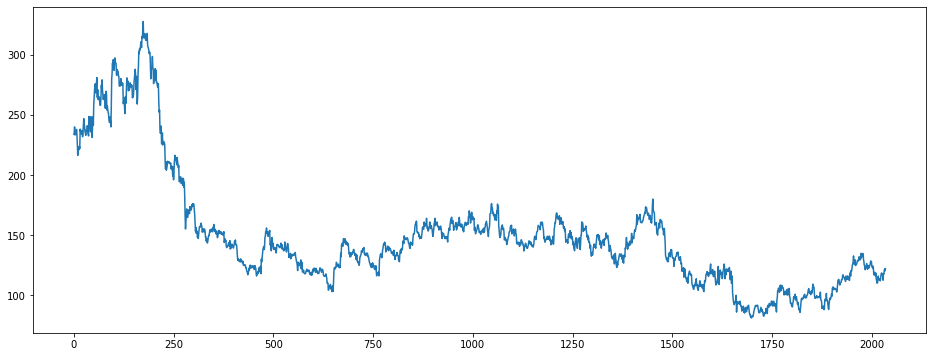

In [13]:
data['Open'].plot(figsize=(16,6))

In [14]:
# 7 day rolling mean
data.rolling(7).mean().head(15)

<ipython-input-14-454f2a8ce50d>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data.rolling(7).mean().head(15)


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
7,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
8,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714
9,233.185714,237.728571,230.171429,234.928571,234.928571,3.527693e+06,8241.347143


In [15]:
#visualization on rolling data

<ipython-input-16-706b5d3ff009>:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data.rolling(window=30).mean()['Close'].plot()


<AxesSubplot: >

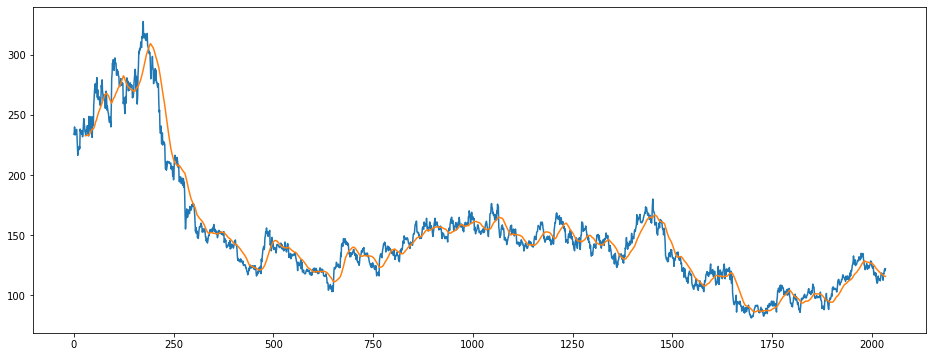

In [16]:
data['Open'].plot(figsize=(16,6))
data.rolling(window=30).mean()['Close'].plot()

<AxesSubplot: >

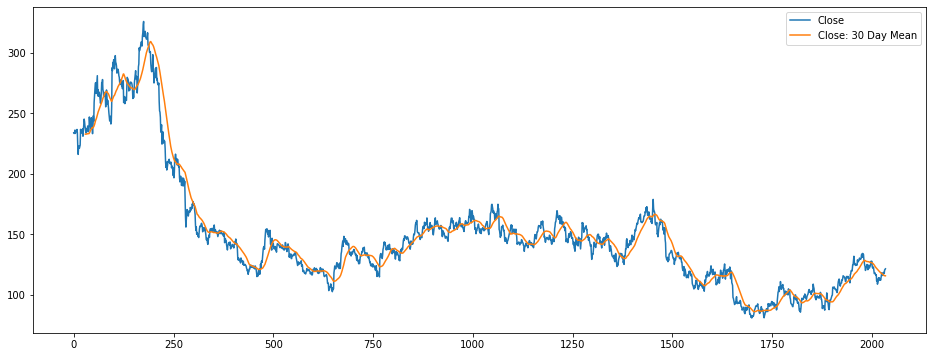

In [17]:
data['Close: 30 Day Mean'] = data['Close'].rolling(window=30).mean()
data[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot: >

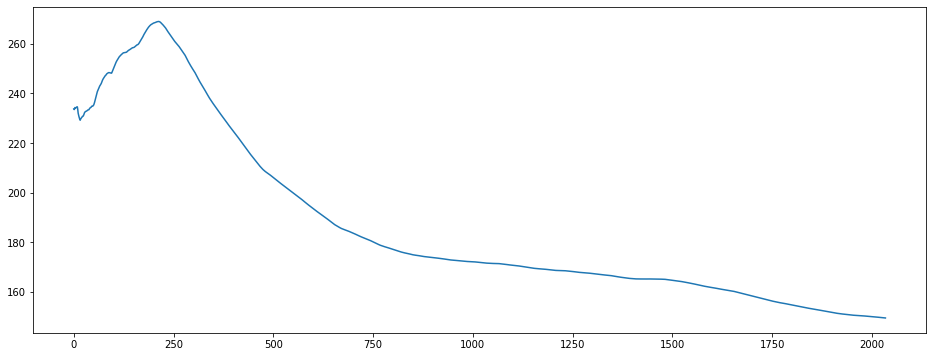

In [18]:
# Optional specify a minimum number of periods
data['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [19]:
#here we are going to work on 'Open' data

In [20]:
#Separating the training data
train=pd.DataFrame(data['Open'])

In [21]:
#scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
sc=MinMaxScaler(feature_range = (0,1))
df=sc.fit_transform(np.array(df).reshape(-1,1))
df.shape

(2035, 1)

In [24]:
train_set.shape

(2035, 1)

In [25]:
#Data spliting in train & Test

In [26]:
training_size=int(len(train_set)*0.75)
test_size=len(train_set)-training_size
train_data,test_data=train_set[0:training_size,:],train_set[training_size:len(train_set),:1]

In [27]:
training_size,test_size

(1526, 509)

In [28]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
# reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [54]:
print(x_test.shape), print(y_test.shape)

(408, 100)
(408,)


(None, None)

In [55]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [56]:
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(408,)


(None, None)

In [33]:
# Create the Stacked LSTM model

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
import tensorflow as tf

In [60]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [61]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 9s 158ms/step - loss: 0.0237 - val_loss: 0.0087
Epoch 2/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0028 - val_loss: 9.3815e-04
Epoch 3/100
23/23 [==============================] - 3s 135ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0013 - val_loss: 9.9187e-04
Epoch 5/100
23/23 [==============================] - 3s 151ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
23/23 [==============================] - 4s 160ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 7/100
23/23 [==============================] - 4s 169ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 4s 175ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
23/23 [==============================] - 5s 220ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 5s 200ms/step - loss: 0.0011 

23/23 [==============================] - 7s 304ms/step - loss: 2.5981e-04 - val_loss: 2.6873e-04
Epoch 77/100
23/23 [==============================] - 7s 311ms/step - loss: 2.5998e-04 - val_loss: 2.0185e-04
Epoch 78/100
23/23 [==============================] - 5s 222ms/step - loss: 2.6564e-04 - val_loss: 2.4100e-04
Epoch 79/100
23/23 [==============================] - 6s 264ms/step - loss: 2.5939e-04 - val_loss: 2.1020e-04
Epoch 80/100
23/23 [==============================] - 7s 324ms/step - loss: 2.5018e-04 - val_loss: 2.9560e-04
Epoch 81/100
23/23 [==============================] - 8s 328ms/step - loss: 2.3815e-04 - val_loss: 2.0852e-04
Epoch 82/100
23/23 [==============================] - 7s 311ms/step - loss: 2.5341e-04 - val_loss: 2.5499e-04
Epoch 83/100
23/23 [==============================] - 7s 314ms/step - loss: 2.4586e-04 - val_loss: 2.2608e-04
Epoch 84/100
23/23 [==============================] - 7s 325ms/step - loss: 2.6421e-04 - val_loss: 2.4938e-04
Epoch 85/100
23/23 [===

In [67]:
#now predict and check performance metrics

In [73]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [76]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [77]:
#root mean square error
print('RMSE performance matrics : ',math.sqrt(mean_squared_error(y_train, train_predict)) )

RMSE performance matrics :  166.7661974249981


In [78]:
print("Test data RMSE : ",math.sqrt(mean_squared_error(y_test , test_predict)) )

Test data RMSE :  107.80111000145443


In [85]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

In [86]:
#Shift test prediction for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df) - 1, :] = test_predict

In [87]:
#Plot baseline

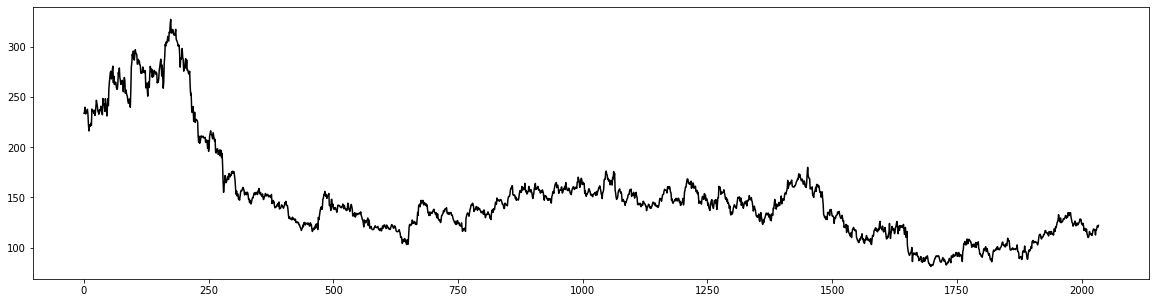

In [89]:
plt.subplots(figsize=(20,5))
plt.plot(sc.inverse_transform(df), color= 'black')
plt.show()

In [90]:
#Training Prediction and Testing Prediction

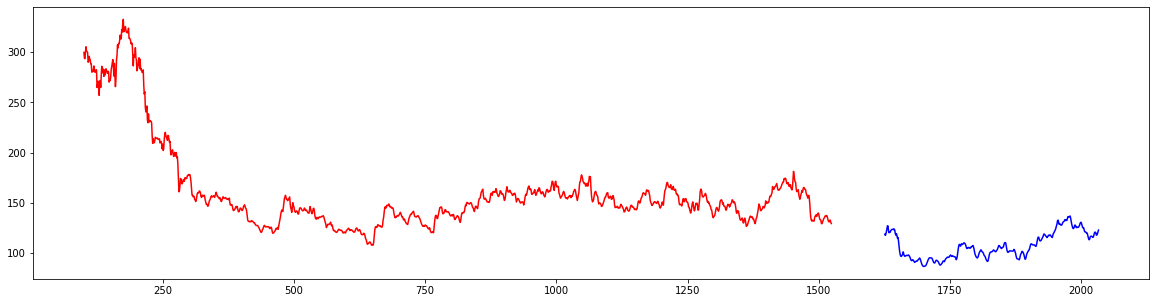

In [91]:
plt.subplots(figsize=(20,5))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='blue')
plt.show()

In [92]:
#Baseline and train, test prediction

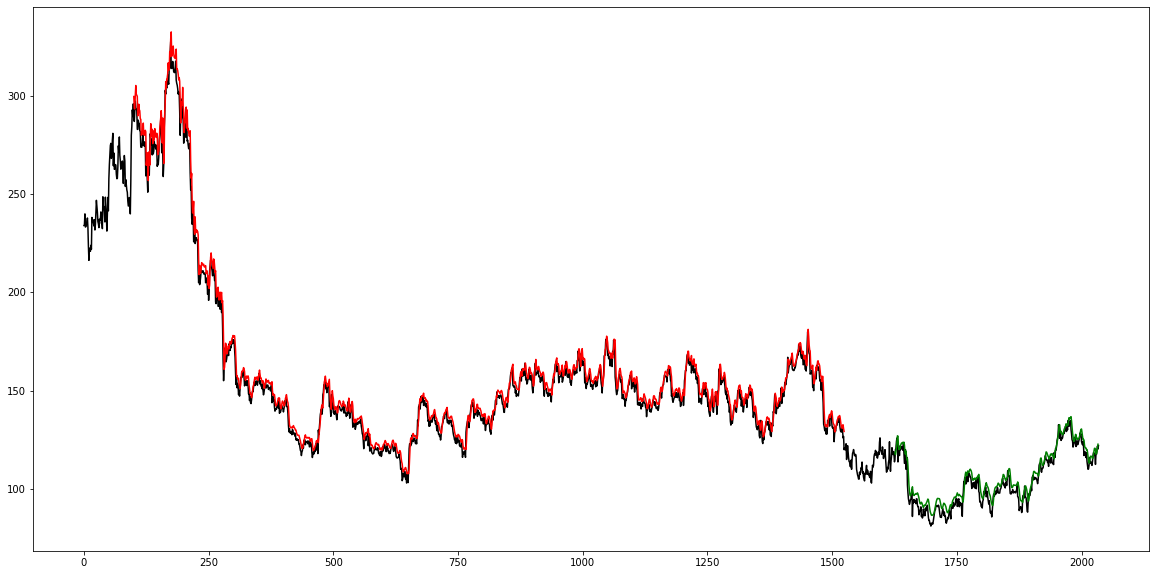

In [94]:
plt.subplots(figsize=(20,10))
plt.plot(sc.inverse_transform(df), color= 'black')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [95]:
# now taking previous 100 days data from test data prediction of future data i.e.

In [96]:
test_data.shape
#509-100=409

(509, 1)

In [97]:
x_ip = test_data[409:].reshape(1,-1)
x_ip.shape

(1, 100)

In [98]:
temp_ip = list(x_ip)
temp_ip = temp_ip[0].tolist()

In [99]:
#Prediction of 15 days
lst_output=[]
n_steps=100

future_Days= 15

i=0

while(i<future_Days):
    
    if(len(temp_ip)>100):
        x_ip = np.array(temp_ip[1:])
        print("Day {} input {}".format(i,x_ip))
        
        x_ip = x_ip.reshape(1,-1)
        x_ip = x_ip.reshape((1, n_steps, 1))
        yhat = model.predict(x_ip, verbose=0)
        print("Day {} output {}\n".format(i,yhat))
        
        temp_ip.extend(yhat[0].tolist())
        temp_ip = temp_ip[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_ip = x_ip.reshape((1, n_steps,1))
        yhat = model.predict(x_ip, verbose=0)
        print(yhat[0])
        temp_ip.extend(yhat[0].tolist())
        print(len(temp_ip))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.1740686]
101
Day 1 input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995 

Day 8 output [[0.21893838]]

Day 9 input [0.1269262  0.15166261 0.15004055 0.14193025 0.16017843 0.15693431
 0.16504461 0.1770073  0.18146796 0.18815896 0.20924574 0.19424169
 0.18106245 0.18207624 0.1960665  0.17680454 0.18207624 0.18004866
 0.18207624 0.18876723 0.19383617 0.19099757 0.19505272 0.19809408
 0.20640714 0.19748581 0.19525547 0.20437956 0.19870235 0.21796431
 0.21553122 0.20600162 0.21654501 0.21654501 0.2175588  0.19870235
 0.19018654 0.17802109 0.175588   0.16301703 0.16707218 0.17112733
 0.17639903 0.18349554 0.1717356  0.16423358 0.16991079 0.17619627
 0.16788321 0.16909976 0.17396594 0.17741281 0.18268451 0.19221411
 0.18896999 0.19018654 0.17396594 0.17092457 0.16788321 0.17477697
 0.16443633 0.14557989 0.15287916 0.15369019 0.15044607 0.14152474
 0.15145985 0.13341444 0.12530414 0.11719384 0.11780211 0.12489862
 0.14132198 0.13098135 0.12935929 0.13240065 0.12895377 0.12530414
 0.13381995 0.14557989 0.15166261 0.15085158 0.14679643 0.14355231
 0.12733171 0.1496350

In [100]:
day_new = np.arange(1,101)
day_pred = np.arange(101,116)

In [101]:
fd = df.tolist()
fd.extend(lst_output)

In [102]:
len(df)
#2035-100=1935

2035

In [103]:
#Plotting the Forcasting

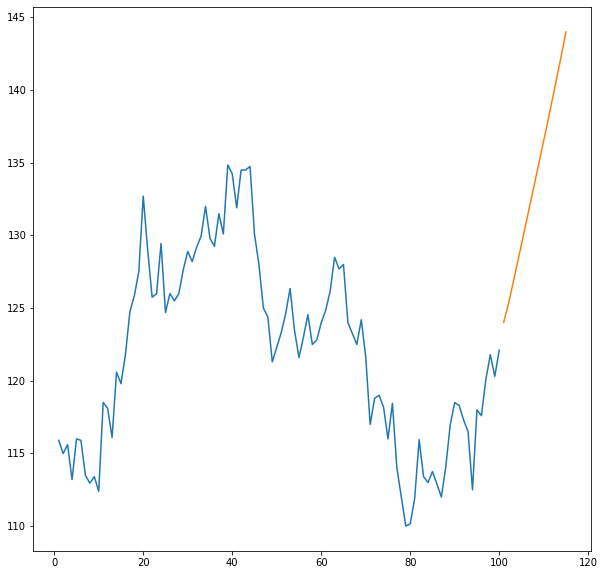

In [104]:
plt.subplots(figsize = (10,10))
plt.plot(day_new, sc.inverse_transform(df[1935:]))
plt.plot(day_pred, sc.inverse_transform(lst_output))

In [ ]:
# Thank You